Accuracy: 0.93
Confusion Matrix:
[[5575  370]
 [  94  354]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5945
           1       0.49      0.79      0.60       448

    accuracy                           0.93      6393
   macro avg       0.74      0.86      0.78      6393
weighted avg       0.95      0.93      0.94      6393



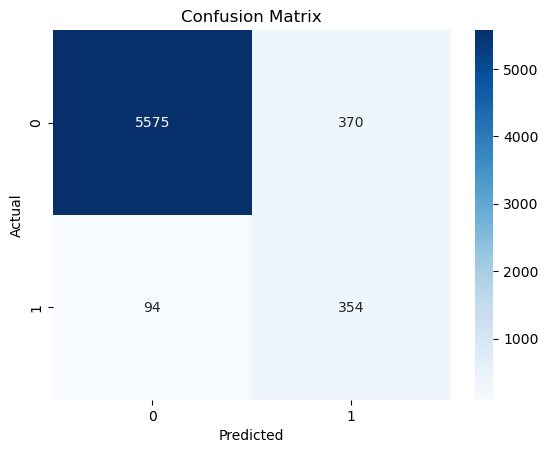

In [1]:
# SENTIMENT ANALYSIS WITH NLP USING TF-IDF AND LOGISTIC REGRESSION
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
# You can download any public dataset for sentiment analysis
# For demonstration, we will use a publicly available dataset

# Load the dataset (example: Amazon reviews dataset)
# Make sure the dataset has 'review' as text data and 'sentiment' as the target
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv" # Example dataset
df = pd.read_csv(url)

# Step 2: Data Preprocessing
# We assume 'tweet' contains the customer review and 'label' contains sentiment (1 = positive, 0 = negative)

df = df[['tweet', 'label']].dropna()  # Use relevant columns and drop missing values
df.columns = ['Comment', 'Sentiment']  # Rename columns to 'Comment' and 'Sentiment'

# Convert 'Comment' to lowercase and strip whitespace
df['Comment'] = df['Comment'].str.lower().str.strip()

# Step 3: Split data into training and testing sets
X = df['Comment']  # Features (customer reviews)
y = df['Sentiment']  # Target (sentiment)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Convert text data into TF-IDF vectors
# Use TF-IDF vectorizer to transform the text data
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Handle class imbalance with SMOTE (if necessary)
# Only apply SMOTE if there is class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Step 6: Model training - Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle imbalance using class_weight
model.fit(X_train_resampled, y_train_resampled)

# Step 7: Evaluate the model on the test set
y_pred = model.predict(X_test_tfidf)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 8: Performance Metrics
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Optional: Visualize confusion matrix (if using matplotlib/seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
